In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Задача 1

#### Даны значения зарплат из выборки выпускников: 
#### 100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150
#### Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое,
#### среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.
#### Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

#### Решение:

In [2]:
df = pd.DataFrame({'salary': [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150]})
df['salary'] = df.sum(axis=1)
df

,salary
0,100
1,80
2,75
3,77
4,89
5,33
6,45
7,25
8,65
9,17


#### Найдем среднее значение зарплат из выборки выпускников:

In [3]:
mean_salary = df['salary'].sum() / df['salary'].count()
mean_salary

65.3

#### Найдем для проверки эту же величину с помощью метода mean:

In [4]:
df['salary'].mean()

65.3

#### Посчитаем среднее квадратичное отклонение зарплат выпускников:

In [5]:
salary_std = np.sqrt(((df['salary'] - df['salary'].mean())**2).sum() / df['salary'].count())
salary_std

30.823854398825596

#### Найдем для проверки эту же величину с помощью метода std:

In [6]:
df['salary'].std(ddof=0)

30.823854398825596

#### Посчитаем смещенную дисперсию зарплат выпускников:

In [7]:
salary_variance = ((df['salary'] - df['salary'].mean())**2).sum() / df['salary'].count()
salary_variance

950.11

#### Посчитаем несмещенную дисперсию зарплат выпускников:

In [8]:
salary_variance2 = ((df['salary'] - df['salary'].mean())**2).sum() / (df['salary'].count() - 1)
salary_variance2

1000.1157894736842

#### С помощью метода var для проверки посчитаем смещенную оценку дисперсии:

In [9]:
df['salary'].var(ddof=0)

950.11

#### Для несмещенной дисперсии:

In [10]:
df['salary'].var(ddof=1)

1000.1157894736842

### Задача 2

#### Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние.
#### Найти выборсы в выборке, используя для этого "усы" из boxplot.
#### В этой задаче можно использовать статистические функции.

#### Решение:

#### Чтобы получить представление о распределении зарплат выпускников, построим гистограмму. 
#### По умолчанию данные разбиваются на 10 частей (аргумент bins). 
#### Высота столбиков соответствует количеству наблюдений в бине:

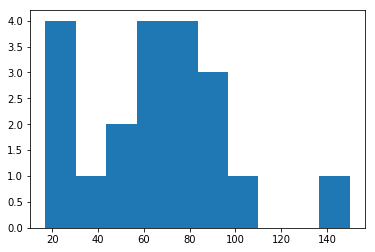

In [11]:
plt.hist(df['salary'])
plt.show()

#### Построим гистограмму еще раз, указав в качестве аргумента bins число 20, чтобы получить более детальную картину:

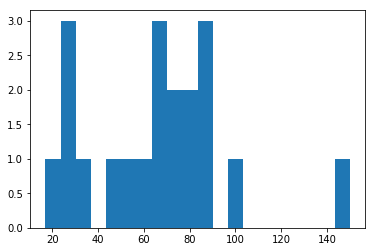

In [12]:
plt.hist(df['salary'], bins = 20)
plt.show()

#### Построим диаграмму boxplot:

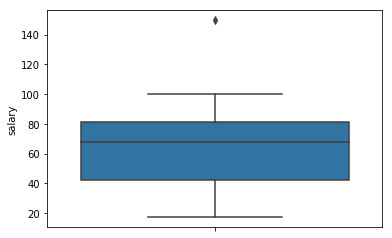

In [13]:
sns.boxplot(df['salary'], orient='v')
plt.show()

#### На данном графике показатели роста располагаются по вертикали.
#### Черта в середине прямоугольника обозначает медиану (синоним - второй квартиль, значение,
#### которое делит выборку на две части так, что значения, которые меньше медианы, составляют половину (50 %) выборки.
#### То есть половина значений выборки больше медианы, половина — не больше),
#### его нижняя сторона — 1-й квартиль (значение, которое не превышают 25 % наблюдений в выборке),
#### а верхняя — 3-й квартиль (значение, которое не превышают 75 % наблюдений в выборке).
#### Интерквартильное расстояние — отрезок, равный разности 3-й и 1-й квартили.
#### От прямоугольника вверх и вниз отходят «усики».
#### Черта на конце нижнего усика отстоит от 1-го квартиля на 1.5 квартильных расстояния,
#### а на конце верхнего — на 1.5 квартильных расстояния от 3-го квартиля.
#### Точки, находящиеся за их пределами, обозначают выбросы в данных — нетипичные наблюдения, которые могут быть и ошибками.

#### Найдем медиану (двумя способами):

In [14]:
median = np.median(df['salary'].values)
median

67.5

In [15]:
median = np.percentile(df['salary'], 50)
median

67.5

#### Найдем 1-й квартиль, 3-ий квартиль и интерквартильное расстояние:

In [16]:
Q1 = np.percentile(df['salary'], 25)
Q1

42.0

In [17]:
Q3 = np.percentile(df['salary'], 75)
Q3

81.0

In [18]:
iqr = Q3 - Q1
iqr

39.0

### Задача 3

#### В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же,
#### сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8.
#### Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9.Студент сдал первую сессию.
#### Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

#### Решение: 

#### 1) Вероятность выбора студента можно расчитать через общее количество поступивших в университет.

#### Пусть в университет на факультеты A и B поступило количество студентов равное n,
#### а на факультет C студентов поступило столько же, сколько на A и B вместе, то есть 2 * n.

#### Тогда общее количество студентов, поступивших в университет равно 4 * n.

#### p1_a = p1_b = n / 4 * n = 0.25, p1_c = 2 * n / 4 * n = 0.5

#### Проверим на полную вероятность p1 = p1_a + p1_b + p1_c = 0.25 + 0.25 + 0.5 = 1

#### 2) Вероятность того, что студент факультета A сдаст первую сессию уже дана и равна p2_a = 0.8.

#### Для студента факультета B эта вероятность равна p2_b = 0.7, а для студента факультета C - p2_c = 0.9.

#### Вероятнсть двух событий равна сумме произведений вероятностей

#### Вероятность, что сдадут равна p1_a * p2_a + p1_b * p2_b + p1_c * p2_c = 0.25 * 0.8 + 0.25 * 0.7 + 0.5 * 0.9 = 0.825

#### Вероятность, что не сдадут равна 0.25 * 0.2 + 0.25 * 0.3 + 0.5 * 0.1 = 0.175

#### Проверим на полную вероятность 0.825 + 0.175 = 1

#### Вероятность из сдавших 82.5% студентов, сдавший сессию студент учится на конкретном факультете посчитаем по формуле Байеса

#### а) Вероятность, что учится на факультете А равна

In [19]:
0.25 * 0.8 / 0.825

0.24242424242424246

#### b) Вероятность, что учится на факультете B равна

In [20]:
0.25 * 0.7 / 0.825

0.21212121212121213

#### c) Вероятность, что учится на факультете C равна

In [21]:
0.5 * 0.9 / 0.825

0.5454545454545455

#### Проверим на полную вероятность 

In [22]:
0.24242424242424246 + 0.21212121212121213 + 0.5454545454545455

1.0